<span style="font-size: 5em">🦜</span>

# __LangGraph Essentials__
## Lab 1: States & Nodes

<img src="../assets/States_Nodes.png" align="left" width="600" style="margin-right:15px;"/>


LangGraph organizes workflows as graphs where nodes are functions and edges define execution flow. All nodes share a common state that gets passed between them. This notebook shows how to define state, create nodes, and connect them into an executable graph.


In [26]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

<a id='state_definition'></a>

In [27]:
class State(TypedDict):
    nlist: List[str]

<a id='node_function'></a>


In [28]:
def node_a(state: State) -> State:
    print(f"node a is receiving {state['nlist']}")
    note = "Hello World from Node a"
    return(State(nlist = [note]))


<a id='graph_building'></a>

In [29]:
builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a", END)
graph = builder.compile()

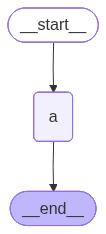

In [30]:
display(Image(graph.get_graph().draw_mermaid_png()))
# print(graph.get_graph().draw_mermaid())

<a id='graph_invoke'></a>

In [31]:
initial_state = State(
    nlist = ["Hello Node a, how are you?"]
)
graph.invoke(initial_state)

node a is receiving ['Hello Node a, how are you?']


{'nlist': ['Hello World from Node a']}

## Takeaways

Setup:

- State: All nodes share the same [state](#state_definition) which can be a Python TypedDict, dataclass, or a Pydantic BaseModel
- Nodes: Defined as simple [Python functions](#node_function) that receive state as input and return updated state

Execution (invoke):

- Runtime: When you call [invoke](#graph_invoke), the graph initializes the input state from your invoke statement and determines which nodes to run
- State Flow: Each node receives the current state as input, executes its logic, and returns an updated state
- Graph Return: After all nodes complete execution, the graph returns the final state value

Try Next:

- Add another node to the [graph](#graph_building) and connect it with edges
- Modify the print statement in the [node function](#node_function) or change the initial state message
- Extend the [State TypedDict](#state_definition) with additional fields to pass more data between nodes

# Next steps

In [38]:
class State1(TypedDict):
    count: int
    n_list: List[str]

In [39]:
def node_a1(state: State1) -> State1:
    print(f"node a is receiving {state}")
    note = "Hello World from Node a1"
    return(State1(n_list = state['n_list'] + [note], count = state['count'] + 1))

In [40]:
def node_b1(state: State1) -> State1:
    print(f"node b is receiving {state}")
    note = "Hello World from Node b1"
    return(State1(n_list = state['n_list'] + [note], count = state['count'] + 1))

In [41]:
builder1 = StateGraph(State1)
builder1.add_node("a", node_a1)
builder1.add_edge(START, "a")
builder1.add_node("b", node_b1)
builder1.add_edge("a", "b")
builder1.add_edge("b", END)
graph1 = builder1.compile()

In [42]:
initial_state1 = State1(n_list = ["Hello, this is another initial state"], count = 0)
graph1.invoke(initial_state1)

node a is receiving {'count': 0, 'n_list': ['Hello, this is another initial state']}
node b is receiving {'count': 1, 'n_list': ['Hello, this is another initial state', 'Hello World from Node a1']}


{'count': 2,
 'n_list': ['Hello, this is another initial state',
  'Hello World from Node a1',
  'Hello World from Node b1']}

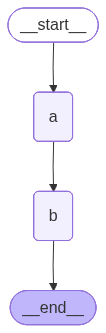

In [43]:
display(Image(graph1.get_graph().draw_mermaid_png()))